In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Helpers.preprocess.main import *
from Helpers.models.simple_ml import *
from Helpers.preprocess.content_based_features import get_content_based_features
from Helpers.preprocess.host_based_features import get_host_based_features
from Helpers.preprocess.lexical_url_features import get_lexical_url_features
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential

## Fully Connected with custom lexical features

In [7]:
df = pd.read_csv("Data/malicious_phish.csv").sample(50000)
df.to_csv("small.csv")

In [8]:
df = preprocess(cache=False,features_extractors=(get_lexical_url_features,),save_to_path="./small_clean.csv",data_path="small.csv")

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

In [9]:
X_train, X_test, y_train, y_test = scale_data(df)

In [21]:
weights = pd.Series(y_train).value_counts().values / y_train.size

In [22]:
weights = {i : weight for i,weight in enumerate(weights)}

In [35]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
y_train = np_utils.to_categorical(LabelEncoder().fit_transform(y_train))
y_test = np_utils.to_categorical(LabelEncoder().fit_transform(y_test))

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(300, activation="relu",input_shape=(472,)))
model.add(Dropout(0.3))
model.add(Dense(150, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 300)               141900    
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_17 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 204       
Total params: 194,804
Trainable params: 194,804
Non-trainable params: 0
________________________________________________

In [37]:
X_train.shape,y_train.shape

((39997, 472), (39997, 4))

In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model.fit(X_train,y_train,batch_size=200,epochs=500,
                    validation_split=0.05,class_weight=weights,
                    use_multiprocessing=True,workers=8,callbacks=[callback])

Epoch 1/500
190/190 [==============================] - 4s 12ms/step - loss: 0.1421 - accuracy: 0.7053 - recall_8: 0.6712 - precision_8: 0.7270 - val_loss: 0.7895 - val_accuracy: 0.7590 - val_recall_8: 0.7525 - val_precision_8: 0.7640
Epoch 2/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0921 - accuracy: 0.7578 - recall_8: 0.7504 - precision_8: 0.7644 - val_loss: 0.7378 - val_accuracy: 0.7625 - val_recall_8: 0.7575 - val_precision_8: 0.7679
Epoch 3/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0831 - accuracy: 0.7756 - recall_8: 0.7686 - precision_8: 0.7809 - val_loss: 0.6431 - val_accuracy: 0.7940 - val_recall_8: 0.7895 - val_precision_8: 0.7975
Epoch 4/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0773 - accuracy: 0.7921 - recall_8: 0.7858 - precision_8: 0.7971 - val_loss: 0.5690 - val_accuracy: 0.8170 - val_recall_8: 0.8125 - val_precision_8: 0.8232
Epoch 5/500
190/190 [==============================] - 2s 8ms/step 

190/190 [==============================] - 2s 8ms/step - loss: 0.0460 - accuracy: 0.8966 - recall_8: 0.8941 - precision_8: 0.8992 - val_loss: 0.4499 - val_accuracy: 0.8925 - val_recall_8: 0.8900 - val_precision_8: 0.8949
Epoch 37/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0451 - accuracy: 0.8979 - recall_8: 0.8956 - precision_8: 0.9004 - val_loss: 0.5121 - val_accuracy: 0.8960 - val_recall_8: 0.8940 - val_precision_8: 0.8989
Epoch 38/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0448 - accuracy: 0.8976 - recall_8: 0.8955 - precision_8: 0.9002 - val_loss: 0.5566 - val_accuracy: 0.8965 - val_recall_8: 0.8955 - val_precision_8: 0.8991
Epoch 39/500
190/190 [==============================] - 2s 9ms/step - loss: 0.0446 - accuracy: 0.8979 - recall_8: 0.8955 - precision_8: 0.9005 - val_loss: 0.4637 - val_accuracy: 0.8985 - val_recall_8: 0.8960 - val_precision_8: 0.9010
Epoch 40/500
190/190 [==============================] - 1s 7ms/step - loss: 0

190/190 [==============================] - 1s 8ms/step - loss: 0.0347 - accuracy: 0.9190 - recall_8: 0.9173 - precision_8: 0.9214 - val_loss: 0.3584 - val_accuracy: 0.9100 - val_recall_8: 0.9095 - val_precision_8: 0.9127
Epoch 107/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0339 - accuracy: 0.9219 - recall_8: 0.9204 - precision_8: 0.9241 - val_loss: 0.3971 - val_accuracy: 0.9030 - val_recall_8: 0.9025 - val_precision_8: 0.9039
Epoch 108/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0336 - accuracy: 0.9213 - recall_8: 0.9202 - precision_8: 0.9234 - val_loss: 0.3856 - val_accuracy: 0.9070 - val_recall_8: 0.9060 - val_precision_8: 0.9087
Epoch 109/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0339 - accuracy: 0.9200 - recall_8: 0.9184 - precision_8: 0.9222 - val_loss: 0.3736 - val_accuracy: 0.9050 - val_recall_8: 0.9030 - val_precision_8: 0.9075
Epoch 110/500
190/190 [==============================] - 1s 8ms/step - los

Epoch 141/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0317 - accuracy: 0.9264 - recall_8: 0.9249 - precision_8: 0.9283 - val_loss: 0.4396 - val_accuracy: 0.9170 - val_recall_8: 0.9150 - val_precision_8: 0.9187
Epoch 142/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0316 - accuracy: 0.9266 - recall_8: 0.9253 - precision_8: 0.9285 - val_loss: 0.4248 - val_accuracy: 0.9115 - val_recall_8: 0.9110 - val_precision_8: 0.9147
Epoch 143/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0322 - accuracy: 0.9279 - recall_8: 0.9266 - precision_8: 0.9299 - val_loss: 0.3569 - val_accuracy: 0.9170 - val_recall_8: 0.9155 - val_precision_8: 0.9196
Epoch 144/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0320 - accuracy: 0.9258 - recall_8: 0.9245 - precision_8: 0.9278 - val_loss: 0.3850 - val_accuracy: 0.9135 - val_recall_8: 0.9125 - val_precision_8: 0.9162
Epoch 145/500
190/190 [==============================] - 2s 

Epoch 176/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0313 - accuracy: 0.9288 - recall_8: 0.9274 - precision_8: 0.9307 - val_loss: 0.4327 - val_accuracy: 0.9100 - val_recall_8: 0.9075 - val_precision_8: 0.9111
Epoch 177/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0302 - accuracy: 0.9307 - recall_8: 0.9296 - precision_8: 0.9325 - val_loss: 0.4475 - val_accuracy: 0.9130 - val_recall_8: 0.9110 - val_precision_8: 0.9151
Epoch 178/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0301 - accuracy: 0.9307 - recall_8: 0.9296 - precision_8: 0.9325 - val_loss: 0.3902 - val_accuracy: 0.9160 - val_recall_8: 0.9145 - val_precision_8: 0.9159
Epoch 179/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0300 - accuracy: 0.9316 - recall_8: 0.9302 - precision_8: 0.9332 - val_loss: 0.4089 - val_accuracy: 0.9220 - val_recall_8: 0.9210 - val_precision_8: 0.9224
Epoch 180/500
190/190 [==============================] - 2s 

Epoch 211/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0289 - accuracy: 0.9336 - recall_8: 0.9324 - precision_8: 0.9350 - val_loss: 0.4047 - val_accuracy: 0.9175 - val_recall_8: 0.9170 - val_precision_8: 0.9188
Epoch 212/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0288 - accuracy: 0.9337 - recall_8: 0.9324 - precision_8: 0.9354 - val_loss: 0.3588 - val_accuracy: 0.9215 - val_recall_8: 0.9200 - val_precision_8: 0.9218
Epoch 213/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0284 - accuracy: 0.9347 - recall_8: 0.9335 - precision_8: 0.9361 - val_loss: 0.3512 - val_accuracy: 0.9195 - val_recall_8: 0.9185 - val_precision_8: 0.9208
Epoch 214/500
190/190 [==============================] - 1s 8ms/step - loss: 0.0289 - accuracy: 0.9335 - recall_8: 0.9324 - precision_8: 0.9349 - val_loss: 0.3756 - val_accuracy: 0.9155 - val_recall_8: 0.9150 - val_precision_8: 0.9178
Epoch 215/500
190/190 [==============================] - 1s 

Epoch 246/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0277 - accuracy: 0.9360 - recall_8: 0.9351 - precision_8: 0.9376 - val_loss: 0.3547 - val_accuracy: 0.9210 - val_recall_8: 0.9190 - val_precision_8: 0.9222
Epoch 247/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0274 - accuracy: 0.9365 - recall_8: 0.9353 - precision_8: 0.9377 - val_loss: 0.3338 - val_accuracy: 0.9170 - val_recall_8: 0.9155 - val_precision_8: 0.9187
Epoch 248/500
190/190 [==============================] - 2s 8ms/step - loss: 0.0278 - accuracy: 0.9357 - recall_8: 0.9350 - precision_8: 0.9369 - val_loss: 0.3934 - val_accuracy: 0.9170 - val_recall_8: 0.9155 - val_precision_8: 0.9183
Epoch 249/500
190/190 [==============================] - 1s 7ms/step - loss: 0.0282 - accuracy: 0.9350 - recall_8: 0.9340 - precision_8: 0.9364 - val_loss: 0.4481 - val_accuracy: 0.9170 - val_recall_8: 0.9165 - val_precision_8: 0.9183
Epoch 250/500
190/190 [==============================] - 2s 

In [42]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6620
           1       0.93      0.77      0.84      1463
           2       0.91      0.81      0.86       474
           3       0.98      0.83      0.90      1443

    accuracy                           0.92     10000
   macro avg       0.93      0.85      0.89     10000
weighted avg       0.93      0.92      0.92     10000



## Charcter based tokinizer with LSTM

In [3]:
df = pd.read_csv("Data/malicious_phish.csv")

In [10]:
df["type"] = pd.Categorical(df["type"]).codes

In [44]:
X = df["url"]
y = df["type"]

Pandas Apply:   0%|          | 0/651191 [00:00<?, ?it/s]

count    651191.000000
mean         60.156831
std          44.753902
min           1.000000
25%          32.000000
50%          47.000000
75%          77.000000
max        2175.000000
Name: url, dtype: float64


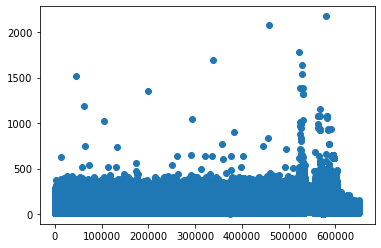

In [29]:
lens = df["url"].swifter.apply(len)
print(lens.describe())
plt.scatter(list(lens.index),lens.values)

In [43]:
# df["type"][lens > 77].value_counts().plot(kind="bar")
df_type = df["type"][lens > 77].reset_index()["type"]
bin_label = pd.Series(np.zeros(df_type.size))
bin_label[df_type!=0] = 1
bin_label.corr(lens)

-1.0761875616299628e-05

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((520952,), (130239,), (520952,), (130239,))

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
toknizer = Tokenizer(char_level=True, oov_token='@',num_words=None)
toknizer.fit_on_texts(X_train)
seq = toknizer.texts_to_sequences(X_train)
seq = pad_sequences(seq,maxlen=77,padding='post')

In [68]:
X_train = seq
X_train.shape

(520952, 77)

### Model

In [78]:
model = Sequential()
model.add(LSTM(70,input_shape=(77,1),recurrent_dropout=0.2))
model.add(Dense(60, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 70)                20160     
_________________________________________________________________
dense_14 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 44        
Total params: 26,604
Trainable params: 26,604
Non-trainable params: 0
_________________________________________________________________


In [79]:
weights = 1 - y.value_counts()/y.size
weights = weights.to_dict()
weights

{0: 0.34258458731769936,
 1: 0.8518760240850994,
 3: 0.8554786537283224,
 2: 0.9500607348688788}

In [76]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
X_train = np.expand_dims(X_train,axis=-1)

In [80]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
# time_stopping_callback = tfa.callbacks.TimeStopping(seconds=60*58, verbose=1) #58min
history = model.fit(X_train,y_train,batch_size=200,epochs=2000,
                    validation_split=0.05,class_weight=weights,
                    use_multiprocessing=True,workers=8,callbacks=[callback])

Epoch 1/2000
2475/2475 [==============================] - 253s 101ms/step - loss: 0.3801 - accuracy: 0.7420 - val_loss: 0.4769 - val_accuracy: 0.8240
Epoch 2/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.2667 - accuracy: 0.8354 - val_loss: 0.4090 - val_accuracy: 0.8576
Epoch 3/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.2307 - accuracy: 0.8668 - val_loss: 0.3341 - val_accuracy: 0.8847
Epoch 4/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.2112 - accuracy: 0.8792 - val_loss: 0.3197 - val_accuracy: 0.8924
Epoch 5/2000
2475/2475 [==============================] - 256s 103ms/step - loss: 0.1981 - accuracy: 0.8862 - val_loss: 0.2890 - val_accuracy: 0.8978
Epoch 6/2000
2475/2475 [==============================] - 262s 106ms/step - loss: 0.1865 - accuracy: 0.8913 - val_loss: 0.2865 - val_accuracy: 0.9012
Epoch 7/2000
2475/2475 [==============================] - 271s 109ms/step - loss: 0.1783 - accuracy:

2475/2475 [==============================] - 250s 101ms/step - loss: 0.0874 - accuracy: 0.9493 - val_loss: 0.1350 - val_accuracy: 0.9563
Epoch 110/2000
2475/2475 [==============================] - 250s 101ms/step - loss: 0.0874 - accuracy: 0.9496 - val_loss: 0.1323 - val_accuracy: 0.9570
Epoch 111/2000
2475/2475 [==============================] - 250s 101ms/step - loss: 0.0873 - accuracy: 0.9495 - val_loss: 0.1355 - val_accuracy: 0.9546
Epoch 112/2000
2475/2475 [==============================] - 251s 101ms/step - loss: 0.0867 - accuracy: 0.9498 - val_loss: 0.1315 - val_accuracy: 0.9557
Epoch 113/2000
2475/2475 [==============================] - 251s 101ms/step - loss: 0.0866 - accuracy: 0.9498 - val_loss: 0.1405 - val_accuracy: 0.9539
Epoch 114/2000
2475/2475 [==============================] - 250s 101ms/step - loss: 0.0867 - accuracy: 0.9496 - val_loss: 0.1267 - val_accuracy: 0.9595
Epoch 115/2000
2475/2475 [==============================] - 251s 101ms/step - loss: 0.0866 - accuracy: 

Epoch 163/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.0810 - accuracy: 0.9531 - val_loss: 0.1265 - val_accuracy: 0.9598
Epoch 164/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.0806 - accuracy: 0.9536 - val_loss: 0.1206 - val_accuracy: 0.9611
Epoch 165/2000
2475/2475 [==============================] - 254s 102ms/step - loss: 0.0806 - accuracy: 0.9534 - val_loss: 0.1191 - val_accuracy: 0.9617
Epoch 166/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.0801 - accuracy: 0.9536 - val_loss: 0.1183 - val_accuracy: 0.9615
Epoch 167/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.0801 - accuracy: 0.9536 - val_loss: 0.1296 - val_accuracy: 0.9586
Epoch 168/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.0803 - accuracy: 0.9537 - val_loss: 0.1309 - val_accuracy: 0.9573
Epoch 169/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.07

Epoch 270/2000
2475/2475 [==============================] - 255s 103ms/step - loss: 0.0735 - accuracy: 0.9575 - val_loss: 0.1155 - val_accuracy: 0.9622
Epoch 271/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.0730 - accuracy: 0.9576 - val_loss: 0.1259 - val_accuracy: 0.9591
Epoch 272/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.0737 - accuracy: 0.9571 - val_loss: 0.1163 - val_accuracy: 0.9628
Epoch 273/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.0734 - accuracy: 0.9573 - val_loss: 0.1135 - val_accuracy: 0.9634
Epoch 274/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.0732 - accuracy: 0.9577 - val_loss: 0.1200 - val_accuracy: 0.9621
Epoch 275/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.0732 - accuracy: 0.9572 - val_loss: 0.1113 - val_accuracy: 0.9630
Epoch 276/2000
2475/2475 [==============================] - 254s 103ms/step - loss: 0.07

Epoch 324/2000
2475/2475 [==============================] - 448s 181ms/step - loss: 0.0715 - accuracy: 0.9583 - val_loss: 0.1074 - val_accuracy: 0.9666
Epoch 325/2000
2475/2475 [==============================] - 448s 181ms/step - loss: 0.0714 - accuracy: 0.9583 - val_loss: 0.1133 - val_accuracy: 0.9637
Epoch 326/2000
2475/2475 [==============================] - 449s 181ms/step - loss: 0.0726 - accuracy: 0.9576 - val_loss: 0.1203 - val_accuracy: 0.9607
Epoch 327/2000
2475/2475 [==============================] - 361s 146ms/step - loss: 0.0711 - accuracy: 0.9585 - val_loss: 0.1263 - val_accuracy: 0.9598
Epoch 328/2000
2475/2475 [==============================] - 242s 98ms/step - loss: 0.0716 - accuracy: 0.9583 - val_loss: 0.1212 - val_accuracy: 0.9610
Epoch 329/2000
2475/2475 [==============================] - 251s 101ms/step - loss: 0.0713 - accuracy: 0.9583 - val_loss: 0.1213 - val_accuracy: 0.9612
Epoch 330/2000
2475/2475 [==============================] - 251s 101ms/step - loss: 0.071

Epoch 378/2000
2475/2475 [==============================] - 261s 106ms/step - loss: 0.0702 - accuracy: 0.9588 - val_loss: 0.1169 - val_accuracy: 0.9625
Epoch 379/2000
2475/2475 [==============================] - 266s 107ms/step - loss: 0.0698 - accuracy: 0.9589 - val_loss: 0.1164 - val_accuracy: 0.9620
Epoch 380/2000
2475/2475 [==============================] - 272s 110ms/step - loss: 0.0700 - accuracy: 0.9592 - val_loss: 0.1158 - val_accuracy: 0.9627
Epoch 381/2000
2475/2475 [==============================] - 275s 111ms/step - loss: 0.0702 - accuracy: 0.9592 - val_loss: 0.1065 - val_accuracy: 0.9651
Epoch 382/2000
2475/2475 [==============================] - 274s 111ms/step - loss: 0.0699 - accuracy: 0.9590 - val_loss: 0.1085 - val_accuracy: 0.9652
Epoch 383/2000
2475/2475 [==============================] - 264s 107ms/step - loss: 0.0701 - accuracy: 0.9590 - val_loss: 0.1115 - val_accuracy: 0.9644
Epoch 384/2000
2475/2475 [==============================] - 253s 102ms/step - loss: 0.07

Epoch 432/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0690 - accuracy: 0.9597 - val_loss: 0.1076 - val_accuracy: 0.9656
Epoch 433/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0687 - accuracy: 0.9598 - val_loss: 0.1099 - val_accuracy: 0.9658
Epoch 434/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0691 - accuracy: 0.9596 - val_loss: 0.1120 - val_accuracy: 0.9646
Epoch 435/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0692 - accuracy: 0.9596 - val_loss: 0.1085 - val_accuracy: 0.9649
Epoch 436/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0683 - accuracy: 0.9601 - val_loss: 0.1186 - val_accuracy: 0.9614
Epoch 437/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.0686 - accuracy: 0.9600 - val_loss: 0.1174 - val_accuracy: 0.9612
Epoch 438/2000
2475/2475 [==============================] - 252s 102ms/step - loss: 0.06

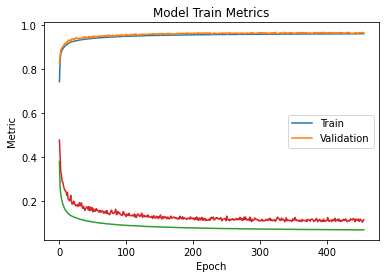

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [82]:
model.save("lstm_char_embedding")

INFO:tensorflow:Assets written to: lstm_char_embedding\assets


In [87]:
# X_train.shape,np.expand_dims(X_test,axis=-1).shape
seq = toknizer.texts_to_sequences(X_test)
seq = pad_sequences(seq,maxlen=77,padding='post')
seq.shape

(130239, 77)

In [88]:
X_test = np.expand_dims(seq,axis=-1)

In [103]:
from sklearn.metrics import classification_report
y_pred_test = model.predict(X_test)
print(classification_report(y_test,y_pred_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     85778
           1       0.97      0.99      0.98     19104
           2       0.97      0.95      0.96      6521
           3       0.87      0.91      0.89     18836

    accuracy                           0.96    130239
   macro avg       0.95      0.95      0.95    130239
weighted avg       0.96      0.96      0.96    130239



In [95]:
from sklearn.metrics import classification_report
y_pred_train = model.predict(X_train)
print(classification_report(y_train.argmax(axis=1),y_pred_train.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    342325
           1       0.98      0.99      0.98     77353
           2       0.98      0.96      0.97     25999
           3       0.88      0.92      0.90     75275

    accuracy                           0.97    520952
   macro avg       0.96      0.96      0.96    520952
weighted avg       0.97      0.97      0.97    520952



In [105]:
mask = y_pred_test.argmax(axis=1) != y_test
mask.shape

(130239,)

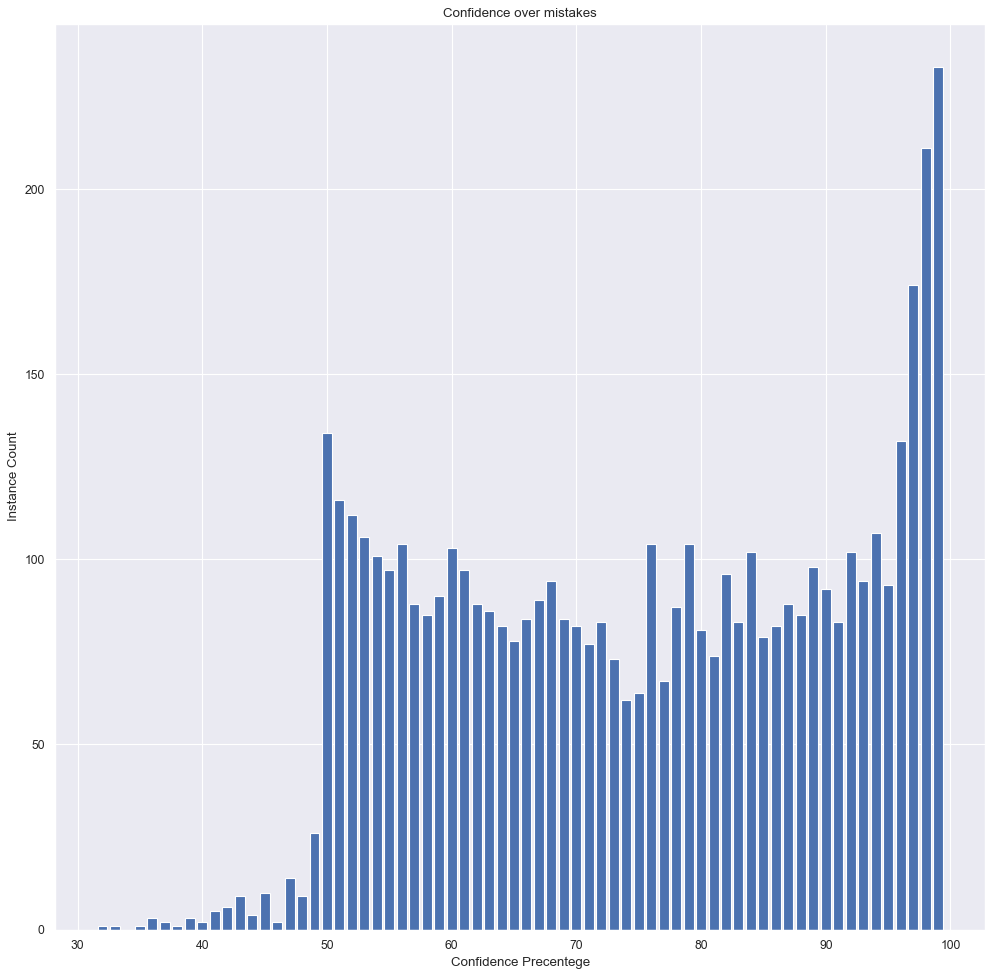

In [116]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(15, 15), dpi=80)
mistakes = X_test[mask,:,:]
y_pred_mistakes = model.predict(mistakes)
counts = (y_pred_mistakes.max(axis=1) * 100).astype(int)
uniques,counts = np.unique(counts,return_counts=True)
plt.bar(uniques,counts)
plt.title("Confidence over mistakes")
plt.xlabel("Confidence Precentege")
plt.ylabel("Instance Count")
plt.show()

## Preformace

In [94]:
instance = X.values[0]
seq = toknizer.texts_to_sequences(instance)
seq = pad_sequences(seq,maxlen=77,padding='post')
seq = np.expand_dims(seq,axis=-1)
y_pred = model.predict(seq)